In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Procesamiento de texto con NLTK**

# Librerías de texto

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Adquisición de datos

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Webtoon Dataset.csv', index_col=0)
data.head()

,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
id,,,,,,,,,
0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [ ]:
grouped=data.groupby('Name')['Summary'].max()
grouped

Name
#Blessed               Joanna is a mid-twenties office girl who likes...
#Killstagram           Remi Do has everything -- she's super pretty, ...
1000                   Set in a modern world of aliens, warlocks, zom...
10th Dimension Boys    In another dimension, anything can happen in y...
1111 Animals                                 The secret lives of animals
                                             ...                        
dustinteractive                      Dustin squiggles about being Frank.
microHUNTER            While out to get his sister's favorite snack, ...
unOrdinary             Nobody paid much attention to John , just a no...
unTouchable            Sia is a modern-day vampire who absorbs energy...
ã„´ã…‡ã„¹ã…‡ã„´ã„¹     The mysterious team that brings Webtoon to you...
Name: Summary, Length: 569, dtype: object

# Limpieza de datos

In [ ]:
grouped = grouped.str.lower()
grouped = grouped.str.strip()
grouped = grouped.str.replace('[^\w\s]', '')
grouped = grouped.str.replace('\d', '')
grouped = grouped.replace('\\n', '')
grouped = grouped.dropna()

grouped

Name
#Blessed               joanna is a midtwenties office girl who likes ...
#Killstagram           remi do has everything  shes super pretty has ...
1000                   set in a modern world of aliens warlocks zombi...
10th Dimension Boys    in another dimension anything can happen in yo...
1111 Animals                                 the secret lives of animals
                                             ...                        
dustinteractive                       dustin squiggles about being frank
microHUNTER            while out to get his sisters favorite snack ba...
unOrdinary             nobody paid much attention to john  just a nor...
unTouchable            sia is a modernday vampire who absorbs energy ...
ã„´ã…‡ã„¹ã…‡ã„´ã„¹     the mysterious team that brings webtoon to you...
Name: Summary, Length: 569, dtype: object

In [ ]:
tokenized = grouped.apply(nltk.word_tokenize)
palabras=tokenized.sum()
tokenized

Name
#Blessed               [joanna, is, a, midtwenties, office, girl, who...
#Killstagram           [remi, do, has, everything, shes, super, prett...
1000                   [set, in, a, modern, world, of, aliens, warloc...
10th Dimension Boys    [in, another, dimension, anything, can, happen...
1111 Animals                           [the, secret, lives, of, animals]
                                             ...                        
dustinteractive                 [dustin, squiggles, about, being, frank]
microHUNTER            [while, out, to, get, his, sisters, favorite, ...
unOrdinary             [nobody, paid, much, attention, to, john, just...
unTouchable            [sia, is, a, modernday, vampire, who, absorbs,...
ã„´ã…‡ã„¹ã…‡ã„´ã„¹     [the, mysterious, team, that, brings, webtoon,...
Name: Summary, Length: 569, dtype: object

# Exploraciones

In [ ]:
cuantas_palabras=tokenized.sum()
texto=nltk.Text(cuantas_palabras)

In [ ]:
texto

<Text: joanna is a midtwenties office girl who likes...>

In [ ]:
registros=data.count()
registros

Name            569
Writer          568
Likes           569
Genre           569
Rating          569
Subscribers     569
Summary         569
Update          569
Reading Link    569
dtype: int64

Se observan 569 registros

In [ ]:
grouped[grouped.str.contains('boy', case=False)].count()

45

Existen 45 registros que incluyen la palabra 'boy'

In [ ]:
texto.concordance('boy')

Displaying 25 of 26 matches:
p the fire boys and karaoke one day a boy she used to know transfers to her sch
 to seek revenge but as a high school boy there she plots to befriend poseidons
e and your life at any moment a young boy named rex hunts for his brothers kill
 fate am i the only one still alive a boy wakes up to find himself in a buildin
 really see them she suddenly meets a boy who not only sees them but fights wit
e threatens the very existence of the boy his family and everyone who now calls
runaway werewolf lumine meets a witch boy named kody and is being hired to work
rts but fame doesnt come for free bad boy front man of the group wyld knows thi
ithout a love triangle enter subaru a boy from another class who isnt afraid to
is horsedrawn carriage and his stable boy she then embarks on a nationwide adve
match made in hell richie is a simple boy with a simple life yes he has a disti
ws just who itll be the most handsome boy in school hansum ochinchin but her pl
when she fa

Se encontraron 26 descripciones que incluyen la palabra 'boy'

In [ ]:
texto.concordance('friend')

Displaying 25 of 31 matches:
lf but a drunken night out with his friend leads him to sign an enlistment for
 team hiding his affections for his friend sally and trying to keep his head d
enough to free himself and his best friend kenma before the beast consumes the
omparison with the help of her best friend yiheon who dreams of being a realli
with the help of his imaginary blob friend inky until one day nam wakes from a
cars that have disappeared his best friend inky is gone too jaerim lee a stude
g is better when its with your best friend learn how to adult with tara and sa
ts the help of her equally gay best friend prince august of phthia but will th
hen he finds out that his imaginary friend enigami isnt so imaginary after all
a villain fall in love asking for a friend a collection of short stories explo
 david alongside his skeptical best friend felix are presented with proof that
tley crew of cats raccoons and best friend norma the upandcoming kpop group ma
o find her biology teac

In [ ]:
texto.concordance('love', lines=15)

Displaying 15 of 80 matches:
                                     love life she accidentally swiped right o
is incident weaving a tangled web of love friendship and dreamers at hanseo hi
oss with his rainbowcolored hair and love of all things fashion arcus is anyth
e whos ever struggled to fit in find love or thought that high school was pret
they rewrite the rules of friendship love work and the best way to clean someo
 someones apartment when his parents love affair draws the ire of a powerful r
engineering and two girls falling in love no matter how technology changes us 
sing forces or will her own onesided love hinder her plans aura is a certified
he beast can catch you a stranger to love kanos only romantic experience lies 
mantic experience lies in novels her love of books has driven her to pursue a 
their tangled relationships and find love while exploring the dusty catacombs 
d instead and oh yeah because modern love isnt hard enoughâhes undead a comic 
tracted her to band cla

Se encontraron 80 de 569 que incluyen la palabra 'love'. En un principio se supuso que más de la mitad de las temáticas de webtoons incluirían dicha palabra

In [ ]:
texto.concordance('tragedy')

Displaying 6 of 6 matches:
eeded him most losing her mother to tragedy as a young child natali fled the sa
do anything to protect lisa after a tragedy sarahs conviction to never lose ano
atters into complete darkness after tragedy jealousy and betrayal what will be 
is first after an unexpected family tragedy a reclusive high school student is 
f bits to me chaplin said life is a tragedy when seen in closeup but a comedy i
across the pumpkin patch a socalled tragedy novel where the beautiful heroine p


'tragedy' es una palabra que se encuentra en un porcentaje pequeño de los registros.

In [ ]:
texto.concordance('jealousy')

Displaying 3 of 3 matches:
to complete darkness after tragedy jealousy and betrayal what will be waiting 
 amidst college gossip crushes and jealousy can the two set aside their differ
elves in the midst of encountering jealousy scandals accidents and misundersta


'jelousy' tienen un porcentaje incluso menor

Se observaron las concordancias de las palabras 'boy', 'girl', 'villain' y 'hero'.

In [ ]:
texto.similar('boy')

woman girl secret but guy career future student teenager villain demon
friends actor deal war child chance fight mermaid carnival


In [ ]:
texto.similar('girl')

day hero best world creatures night future monster things human
mermaid duke woman man loner love life gods goddesses one


In [ ]:
texto.similar('villain')

girl guy boy child mermaid man beacon knight rabbit delinquent loner
recluse superthief germaphobe


In [ ]:
texto.similar('hero')

girl day world secret ability path human help end duke power shadows
love life gods goddesses fulfill will be best


Se buscaron las concordancias de las palabras 'boy', 'girl' y 'love'.

In [ ]:
texto.common_contexts('boy')

('The following word(s) were not found:', 'b o y')


In [ ]:
texto.common_contexts('girl')

('The following word(s) were not found:', 'g i r l')


In [ ]:
texto.common_contexts('love')

('The following word(s) were not found:', 'l o v e')


Se observó la riqueza de palabras en el texto

In [ ]:
# Total de palabras distintas

len(set(texto))

5877

In [ ]:
# Cuantificando la riqueza léxica

len(set(texto))/len(texto)

0.18007169776633883

Se buscaron las colocaciones para entender mejor el contexto de las palabras mayormente registradas

In [ ]:
texto.collocations()

high school; one day; best friend; truth behind; ten years; school
student; second chance; ever since; years ago; food chain; high
schooler; transfer student; mount hua; office worker; stumbles upon;
left behind; looks like; college student; even though; happy ending


In [ ]:
all_words = tokenized.sum()

In [ ]:
stop_words=stopwords.words('english')
all_words_stop=[word for word in all_words if word not in stop_words]
freq_dist=nltk.FreqDist(all_words_stop)

In [ ]:
freq_dist.most_common(20)

[('life', 185),
 ('world', 151),
 ('one', 111),
 ('school', 107),
 ('new', 90),
 ('love', 80),
 ('find', 66),
 ('high', 65),
 ('young', 63),
 ('get', 62),
 ('way', 59),
 ('day', 58),
 ('must', 53),
 ('become', 51),
 ('people', 50),
 ('make', 50),
 ('even', 49),
 ('hes', 49),
 ('time', 48),
 ('friends', 48),
 ('story', 48),
 ('two', 47),
 ('like', 46),
 ('human', 46),
 ('shes', 45),
 ('lives', 44),
 ('ever', 44),
 ('girl', 43),
 ('back', 43),
 ('every', 42),
 ('years', 42),
 ('mysterious', 42),
 ('could', 41),
 ('help', 41),
 ('save', 41),
 ('student', 40),
 ('secret', 38),
 ('would', 38),
 ('finds', 38),
 ('everything', 37),
 ('family', 36),
 ('keep', 36),
 ('first', 35),
 ('able', 34),
 ('together', 34),
 ('death', 34),
 ('things', 34),
 ('best', 33),
 ('little', 31),
 ('past', 31)]

La relación de palabras más comúnes pareció un hallazgo un poco predecible, pues se relacionan completamente con la percepción del tipo de historias encontradas en los webtoons y en la siquiente gráfica se observan los conteos de las 10 palabras más comúnes.

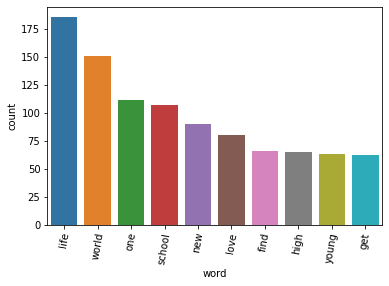

In [ ]:
most_common_10=pd.DataFrame(freq_dist.most_common(10),columns=['word', 'count'])

fig=plt.figure()
ax=fig.add_subplot()
sns.barplot(data=most_common_10, x='word', y='count', ax=ax)
ax.tick_params(axis='x', rotation=80)

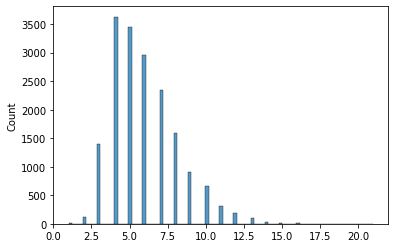

In [ ]:
world_lenghts=[len(word) for word in all_words_stop]
sns.histplot(world_lenghts)

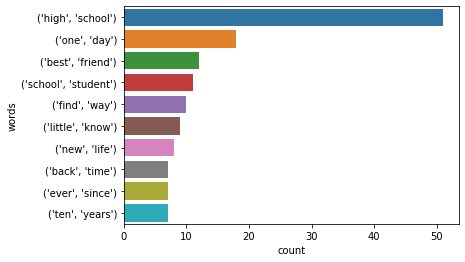

In [ ]:
text=nltk.Text(all_words_stop)
freq_dist_bigrams=nltk.FreqDist(list(nltk.bigrams(text)))
common_10=pd.DataFrame(freq_dist_bigrams.most_common(10), columns=['words', 'count'])
sns.barplot(data=common_10, x='count', y='words')

Se observan los bigramas más frecuentes dentro de las descripciones que de nuevo parecen predecibles.

In [ ]:
from wordcloud import WordCloud

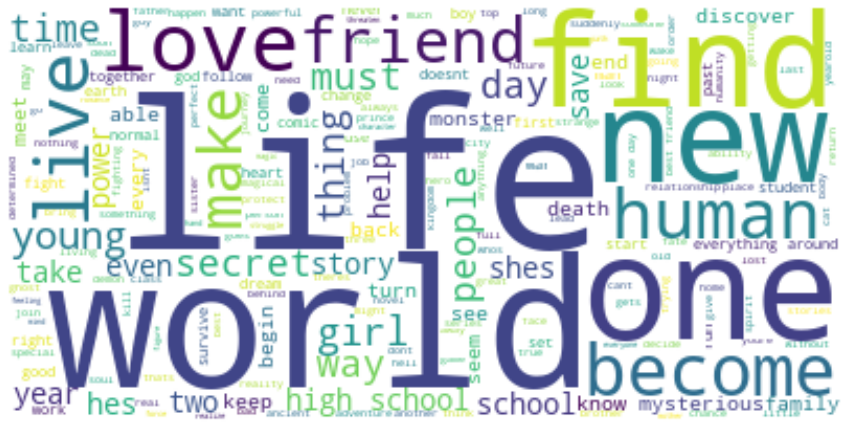

In [ ]:
wordcloud= WordCloud(max_font_size=100, background_color='white').generate(' '.join(all_words_stop))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Finalmente se observan las palabras más comúnes en un gráfico de texto.